In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score


# Data Loading

In [106]:
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv'
df = pd.read_csv(url)
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


# Data preparation
* Check if the missing values are presented in the features.
* If there are missing values:
    * For categorical features, replace them with 'NA'
    * For numerical features, replace with with 0.0

In [107]:
df.isna().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [108]:
df.dtypes != 'object'

lead_source                 False
industry                    False
number_of_courses_viewed     True
annual_income                True
employment_status           False
location                    False
interaction_count            True
lead_score                   True
converted                    True
dtype: bool

In [109]:
df[['lead_source','industry','annual_income','employment_status','location']]

,lead_source,industry,annual_income,employment_status,location
0,paid_ads,NaN,79450.0,unemployed,south_america
1,social_media,retail,46992.0,employed,south_america
2,events,healthcare,78796.0,unemployed,australia
3,paid_ads,retail,83843.0,NaN,australia
4,referral,education,85012.0,self_employed,europe
...,...,...,...,...,...
1457,referral,manufacturing,NaN,self_employed,north_america
1458,referral,technology,65259.0,student,europe
1459,paid_ads,technology,45688.0,student,north_america
1460,referral,NaN,71016.0,self_employed,north_america


In [110]:
# Fill missing vilues with 0
df['annual_income'] = df['annual_income'].fillna(0)

In [111]:
# Loop through each cat col and replace NAN w/ NA str
cat_cols = ['lead_source','industry','employment_status','location']

for col in cat_cols:
    df[col] = df[col].fillna('NA')

# Question 1

What is the most frequent observation (mode) for the column `industry`?

- `NA`
- `technology`
- `healthcare`
- `retail`

In [112]:
df['industry'].mode()

0    retail
Name: industry, dtype: object

# Question 2

Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your dataset. 
In a correlation matrix, you compute the correlation coefficient between every pair of features.

What are the two features that have the biggest correlation?

- `interaction_count` and `lead_score`
- `number_of_courses_viewed` and `lead_score`
- `number_of_courses_viewed` and `interaction_count`
- `annual_income` and `interaction_count`

Only consider the pairs above when answering this question.

In [76]:
# Get numerical columns
numerical_cols = ['number_of_courses_viewed', 'annual_income', 'interaction_count',
'lead_score']

df_num = df[numerical_cols]

df_num.corr().round(3)

,number_of_courses_viewed,annual_income,interaction_count,lead_score
number_of_courses_viewed,1.000,0.010,-0.024,-0.005
annual_income,0.010,1.000,0.027,0.016
interaction_count,-0.024,0.027,1.000,0.010
lead_score,-0.005,0.016,0.010,1.000


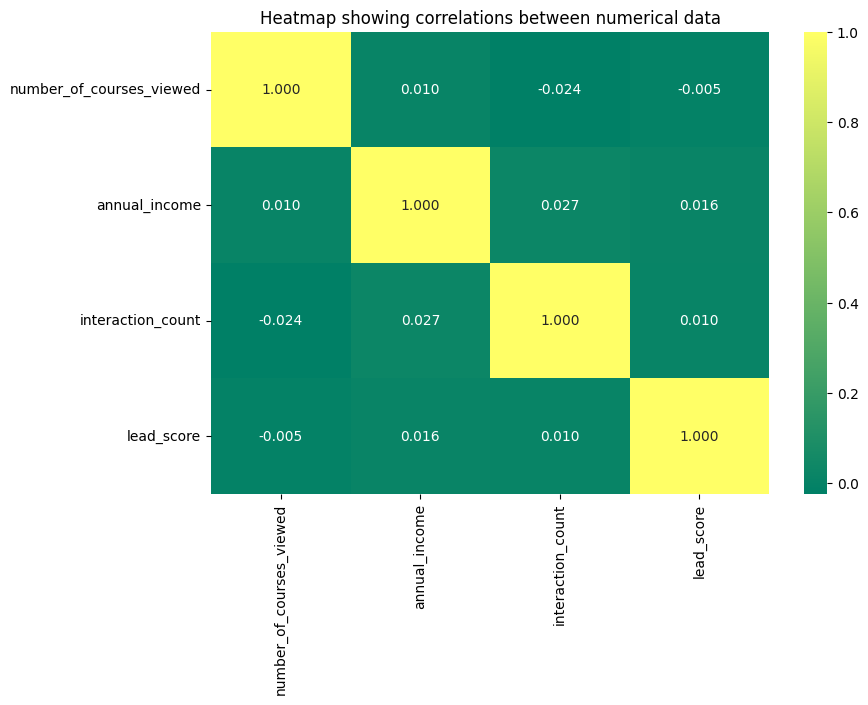

In [77]:
plt.figure(figsize=(9, 6))
sns.heatmap(df_num.corr(), cmap="summer", annot=True, fmt='.3f')
plt.title('Heatmap showing correlations between numerical data')
plt.show()

# Split the data

* Split your data in train/val/test sets with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`.
* Make sure that the target value `y` is not in your dataframe.

In [78]:
# 80/20 split
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [79]:
# 60/20/20
df_train, df_val = train_test_split(df_train_full, test_size=.25, random_state=42)

In [113]:
# reset index
df_full_train = df_train_full.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [114]:
y_train = df_train['converted']
y_val = df_val['converted']
y_test = df_test['converted']

In [115]:
del df_train['converted']
del df_val['converted']
del df_test['converted']

# Question 3

* Calculate the mutual information score between `y` and other categorical variables in the dataset. Use the training set only.
* Round the scores to 2 decimals using `round(score, 2)`.

Which of these variables has the biggest mutual information score?
  
- `industry`
- `location`
- `lead_source`
- `employment_status`

In [95]:
round(mutual_info_score(df_train['converted'],df_train['industry']),2)

0.01

In [83]:
round(mutual_info_score(df_train['converted'],df_train['location']),2)

0.0

In [84]:
round(mutual_info_score(df_train['converted'],df_train['lead_source']),2)

0.04

In [85]:
round(mutual_info_score(df_train['converted'],df_train['employment_status']),2)

0.01

# Question 4

* Now let's train a logistic regression.
* Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

- 0.64
- 0.74
- 0.84
- 0.94

In [86]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [87]:
dv = DictVectorizer(sparse=False)
dict_train = df_train.to_dict(orient='records')
X_train = dv.fit_transform(dict_train)

dict_val = df_val.to_dict(orient='records')
X_val = dv.transform(dict_val)

In [88]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [89]:
y_pred = model.predict(X_val)
y_pred

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0])

In [90]:
convert_decision = (y_pred == 1)

In [91]:
(convert_decision == y_val).mean().round(2)

np.float64(0.76)

# Question 5 

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model using the same features and parameters as in Q4 (without rounding).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 

Which of following feature has the smallest difference?

- `'industry'`
- `'employment_status'`
- `'lead_score'`

> **Note**: The difference doesn't have to be positive.


In [121]:
features_remove = ['industry', 'employment_status', 'lead_score']

#baseline: Train
dv = DictVectorizer(sparse=False)

dict_train = df_train.to_dict(orient='records')
X_train = dv.fit_transform(dict_train)

dict_val = df_val.to_dict(orient='records')
X_val = dv.transform(dict_val)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
base_accuracy = (y_pred == y_val).mean().round(2)

# store final results

results = {}

for feature in features_remove:
    reduce_feature = [f for f in df_train.columns if f != feature]
    dv = DictVectorizer(sparse=False)

    dict_train = df_train[reduce_feature].to_dict(orient='records')
    X_train_reduce = dv.fit_transform(dict_train)

    dict_val = df_val[reduce_feature].to_dict(orient='records')
    X_val_reduce = dv.transform(dict_val)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train_reduce, y_train)

    y_pred_reduce = model.predict(X_val_reduce)
    
    accuracy_reduce = (y_pred_reduce == y_val).mean()
    
    diff = base_accuracy - accuracy_reduce
    
    results[feature] = diff
    
print(results)

{'industry': np.float64(0.0003412969283276279), 'employment_status': np.float64(0.003754266211604018), 'lead_score': np.float64(-0.006484641638225264)}


In [117]:
dv.get_feature_names_out()

array(['annual_income', 'employment_status=NA',
       'employment_status=employed', 'employment_status=self_employed',
       'employment_status=student', 'employment_status=unemployed',
       'industry=NA', 'industry=education', 'industry=finance',
       'industry=healthcare', 'industry=manufacturing', 'industry=other',
       'industry=retail', 'industry=technology', 'interaction_count',
       'lead_source=NA', 'lead_source=events',
       'lead_source=organic_search', 'lead_source=paid_ads',
       'lead_source=referral', 'lead_source=social_media', 'location=NA',
       'location=africa', 'location=asia', 'location=australia',
       'location=europe', 'location=middle_east',
       'location=north_america', 'location=south_america',
       'number_of_courses_viewed'], dtype=object)

# Question 6

* Now let's train a regularized logistic regression.
* Let's try the following values of the parameter `C`: `[0.01, 0.1, 1, 10, 100]`.
* Train models using all the features as in Q4.
* Calculate the accuracy on the validation dataset and round it to 3 decimal digits.

Which of these `C` leads to the best accuracy on the validation set?

- 0.01
- 0.1
- 1
- 10
- 100

> **Note**: If there are multiple options, select the smallest `C`.

In [93]:
for c in [0.01, 0.1, 1, 10, 100]:
    
    model = LogisticRegression(solver='liblinear', C=c, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    accuracy = (y_pred == y_val).mean().round(2)

    print(f'Alpha: {c}, Accuracy: {accuracy}')


Alpha: 0.01, Accuracy: 0.77
Alpha: 0.1, Accuracy: 0.76
Alpha: 1, Accuracy: 0.76
Alpha: 10, Accuracy: 0.76
Alpha: 100, Accuracy: 0.76
